## Questions

1. What influences students performance the most?
2. How do boys and girls perform across states?
3. Do students from South Indian states really excel at Math and Science?

## Data Exploration

In [1]:
# loading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# suppress all warnings
import warnings
warnings.filterwarnings('ignore')


marks = pd.read_csv('gramener-usecase-nas/nas-pupil-marks.csv')
labels = pd.read_csv('gramener-usecase-nas/nas-labels.csv')

In [2]:
marks.head(3)

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.0,NaN,NaN


In [3]:
# Column names of dataset
marks.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu',
       'Father occupation', 'Mother occupation', 'Below poverty',
       'Use calculator', 'Use computer', 'Use Internet', 'Use dictionary',
       'Read other books', '# Books', 'Distance', 'Computer use',
       'Library use', 'Like school', 'Subjects', 'Give Lang HW',
       'Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW',
       'Correct Math HW', 'Correct Scie HW', 'Correct SocS HW',
       'Help in Study', 'Private tuition', 'English is difficult',
       'Read English', 'Dictionary to learn', 'Answer English WB',
       'Answer English aloud', 'Maths is difficult', 'Solve Maths',
       'Solve Maths in groups', 'Draw geometry', 'Explain answers',
       'SocSci is difficult', 'Historical excursions', 'Participate in SocSci',
       'Small groups in SocSci', 'Express SocSci views',
       'Science is difficult', 'Observe e

In [4]:
# The shape of data
marks.shape

(185348, 64)

In [5]:
# Splitting the columns into independent categories and performance
category = ['State', 'District', 'Gender', 'Age', 'Category',
       'Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu',
       'Father occupation', 'Mother occupation', 'Below poverty',
       'Use calculator', 'Use computer', 'Use Internet', 'Use dictionary',
       'Read other books', '# Books', 'Distance', 'Computer use',
       'Library use', 'Like school', 'Subjects', 'Give Lang HW',
       'Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW',
       'Correct Math HW', 'Correct Scie HW', 'Correct SocS HW',
       'Help in Study', 'Private tuition', 'English is difficult',
       'Read English', 'Dictionary to learn', 'Answer English WB',
       'Answer English aloud', 'Maths is difficult', 'Solve Maths',
       'Solve Maths in groups', 'Draw geometry', 'Explain answers',
       'SocSci is difficult', 'Historical excursions', 'Participate in SocSci',
       'Small groups in SocSci', 'Express SocSci views',
       'Science is difficult', 'Observe experiments', 'Conduct experiments',
       'Solve science problems', 'Express science views', 'Watch TV',
       'Read magazine', 'Read a book', 'Play games', 'Help in household']
performance = ['Maths %', 'Reading %', 'Science %', 'Social %']

# unique values in each category
for c in category:
    print (c,":",marks[c].unique())

State : ['AP' 'AR' 'BR' 'CG' 'DL' 'GA' 'GJ' 'HR' 'HP' 'JK' 'JH' 'KA' 'KL' 'MP' 'MH'
 'MN' 'MG' 'MZ' 'NG' 'OR' 'PB' 'RJ' 'SK' 'TN' 'TR' 'UP' 'UK' 'WB' 'AN' 'CH'
 'PY' 'DN' 'DD']
District : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28]
Gender : [1 2 0]
Age : [3 2 5 0 4 6 1]
Category : [3 4 0 1 2]
Same language : [1 2 0]
Siblings : [5 4 2 3 1]
Handicap : [2 0 1]
Father edu : [1 2 3 0 4 5]
Mother edu : [1 2 0 3 5 4]
Father occupation : [3 7 0 5 2 4 1 8 6]
Mother occupation : [3 5 2 0 1 6 4 7 8]
Below poverty : [0 1 2]
Use calculator : [1 2 0]
Use computer : ['No' nan 'Yes']
Use Internet : [1 2 0]
Use dictionary : [2 1 0]
Read other books : [2 1 0]
# Books : [2 4 1 0 3]
Distance : [1 2 3 4 0]
Computer use : [2 3 1 5 4 0]
Library use : [2 3 4 0 1 5]
Like school : [2 1 0]
Subjects : ['L' 'S' 'O' 'M' '0']
Give Lang HW : [4 0 1 3 2]
Give Math HW : [4 3 0 1 2]
Give Scie HW : [3 4 0 2 1]
Give SoSc HW : [3 4 0 2 1]
Correct Lang HW : [4 1 2 3 0]
Correct Math

### What influences students performance the most?

We defined a performance metric as 'performance' = average of ('Maths %', 'Reading %', 'Science %', 'Social %'). A feature selection is performed based on `SelectKBest` to evaluvate the relative importance in predicting performance. The top features were found for each subject as well as for average of all.

|Parameter|Best Feature |
| --- |:--- |
|Overall Performance|'Father edu'|
|Maths|'Help in household'|
|Reading|'Mother edu'|
|Science|'Father edu'|
|Social|'Help in household'|

This concludeds that the education of parents were the most decisive predictor in deciding a student's  performance. Among top features, 'Father edu' has distinctly higher scores for performance, almost **33%** higher than the second feature indicating a very high relevance.

In [6]:
# adding performance column as the average of all scores
# np.nanmean is used across the horizontal axis to avoid "NaN" values to calculate mean.
marks["performance"]=marks[performance].apply(np.nanmean, axis=1)
marks["performance"].describe()

count    180774.000000
mean         38.095342
std          14.949624
min           0.000000
25%          27.035000
50%          35.640000
75%          47.320000
max         100.000000
Name: performance, dtype: float64

In [7]:
# no. of null values and corresponding columns
pd.isnull(marks).sum()[pd.isnull(marks).sum()!=0]

Use computer    19162
Maths %         92667
Reading %       92077
Science %       94356
Social %        95777
performance      4574
dtype: int64

    Column Name Level                Rename
208  State   AN    AN     Andaman & Nicobar
209  State   AP    AP        Andhra Pradesh
210  State   AR    AR     Arunachal Pradesh
211  State   BR    BR                 Bihar
212  State   CG    CG           Chattisgarh
213  State   CH    CH            Chandigarh
214  State   DD    DD           Daman & Diu
215  State   DL    DL                 Delhi
216  State   DN    DN  Dadra & Nagar Haveli
217  State   GA    GA                   Goa
218  State   GJ    GJ               Gujarat
219  State   HP    HP      Himachal Pradesh
220  State   HR    HR               Haryana
221  State   JH    JH             Jharkhand
222  State   JK    JK       Jammu & Kashmir
223  State   KA    KA             Karnataka
224  State   KL    KL                Kerala
225  State   MG    MG             Meghalaya
226  State   MH    MH           Maharashtra
227  State   MN    MN               Manipur
228  State   MP    MP        Madhya Pradesh
229  State   MZ    MZ           

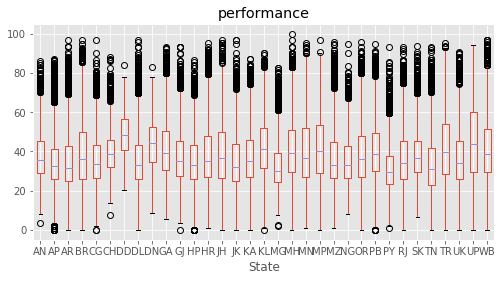

Empty DataFrame
Columns: [Column, Name, Level, Rename]
Index: []


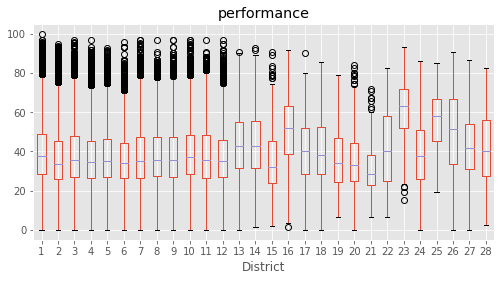

   Column  Name Level Rename
0  Gender   Boy     1    Boy
1  Gender  Girl     2   Girl


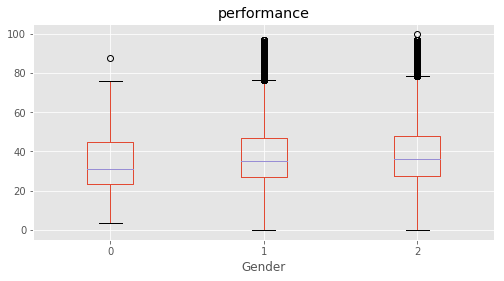

  Column                Name Level     Rename
2    Age            12 years     2   12 years
3    Age            13 years     3   13 years
4    Age            14 years     4   14 years
5    Age            15 years     5   15 years
6    Age  16 years and above     6  16+ years
7    Age       Upto 11 years     1  11- years


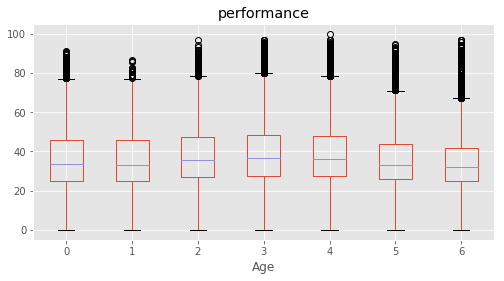

      Column Name Level Rename
8   Category    0     0      0
9   Category    1     1      1
10  Category    2     2      2
11  Category    3     3      3
12  Category    4     4      4


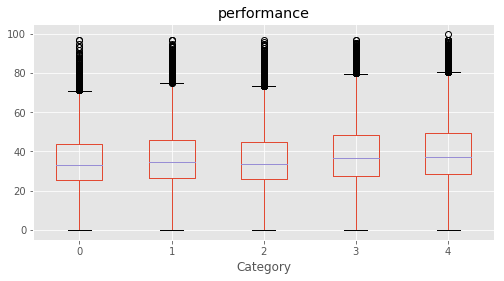

           Column Name Level Rename
13  Same language    0     0      0
14  Same language    1     1      1
15  Same language    2     2      2


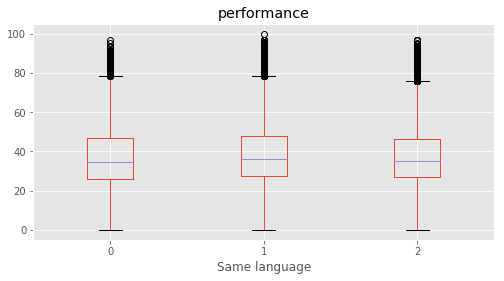

      Column                 Name Level        Rename
16  Siblings            1 sibling     1     1 sibling
17  Siblings            2 sibling     2    2 siblings
18  Siblings            3 sibling     3    3 siblings
19  Siblings  4 and above sibling     4   4+ siblings
20  Siblings         Single Child     0  Single child


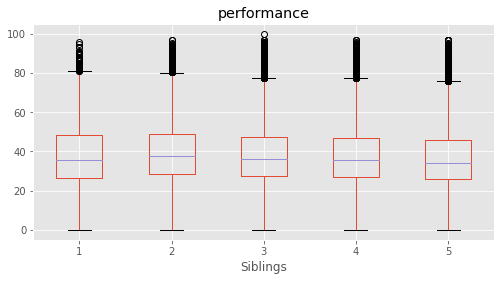

      Column Name Level   Rename
21  Handicap    0     0  Unknown
22  Handicap    1     1      Yes
23  Handicap    2     2       No


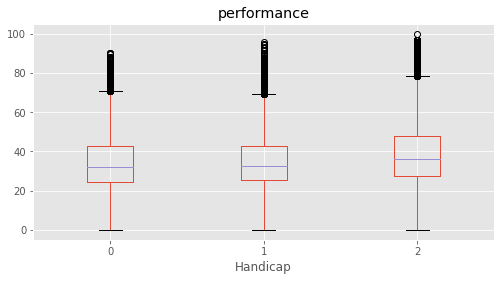

        Column                    Name Level          Rename
24  Father edu        Degree and above     5  Degree & above
25  Father edu              Illiterate     1      Illiterate
26  Father edu          Not applicable     0  Not applicable
27  Father edu           Primary level     2         Primary
28  Father edu         Secondary level     3       Secondary
29  Father edu  Senior secondary level     4    Sr secondary


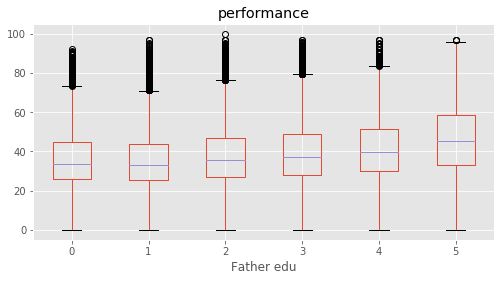

        Column                    Name Level          Rename
30  Mother edu        Degree and above     5  Degree & above
31  Mother edu              Illiterate     1      Illiterate
32  Mother edu          Not applicable     0  Not applicable
33  Mother edu           Primary level     2         Primary
34  Mother edu         Secondary level     3       Secondary
35  Mother edu  Senior secondary level     4    Sr secondary


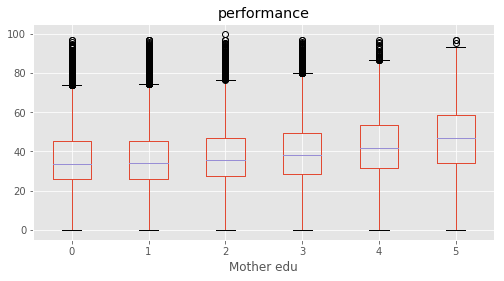

               Column                                 Name Level  \
36  Father occupation                                Clerk     4   
37  Father occupation                          Do not know     0   
38  Father occupation                               Farmer     3   
39  Father occupation                             Labourer     2   
40  Father occupation  Manager/Senior Officer/Professional     8   
41  Father occupation              Shopkeeper/ Businessman     6   
42  Father occupation                       Skilled Worker     5   
43  Father occupation           Teacher/Lecturer/Professor     7   
44  Father occupation                           Unemployed     1   

              Rename  
36             Clerk  
37       Do not know  
38            Farmer  
39          Labourer  
40      Professional  
41          Business  
42    Skilled Worker  
43  Teacher/Lecturer  
44        Unemployed  


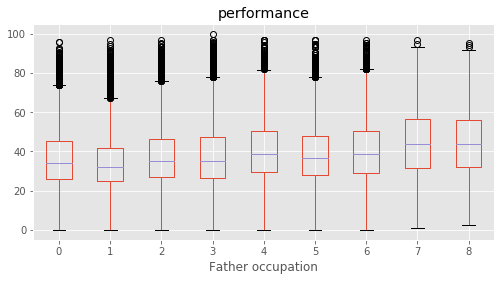

               Column                                 Name Level  \
45  Mother occupation                                Clerk     4   
46  Mother occupation                          Do not know     0   
47  Mother occupation                               Farmer     3   
48  Mother occupation                             Labourer     2   
49  Mother occupation  Manager/Senior Officer/Professional     8   
50  Mother occupation              Shopkeeper/ Businessman     6   
51  Mother occupation                       Skilled Worker     5   
52  Mother occupation           Teacher/Lecturer/Professor     7   
53  Mother occupation                           Unemployed     1   

              Rename  
45             Clerk  
46       Do not know  
47            Farmer  
48          Labourer  
49      Professional  
50          Business  
51    Skilled Worker  
52  Teacher/Lecturer  
53        Unemployed  


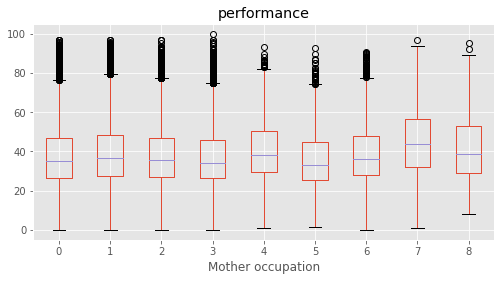

           Column        Name Level      Rename
54  Below poverty  Don't know     0  Don't know
55  Below poverty          No     1          No
56  Below poverty         Yes     2         Yes


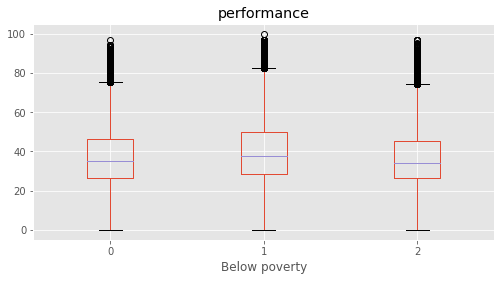

            Column Name Level Rename
57  Use calculator   No     1     No
58  Use calculator  Yes     2    Yes
59  Use calculator   No     1     No
60  Use calculator  Yes     2    Yes


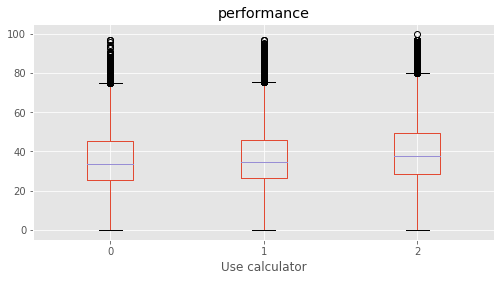

Empty DataFrame
Columns: [Column, Name, Level, Rename]
Index: []


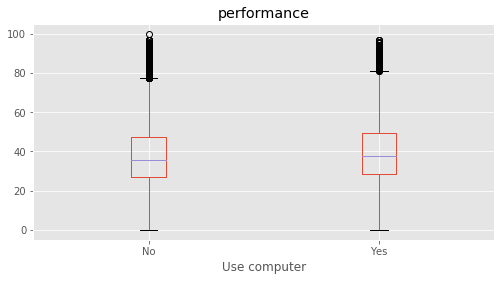

          Column Name Level Rename
61  Use Internet   No     1     No
62  Use Internet  Yes     2    Yes


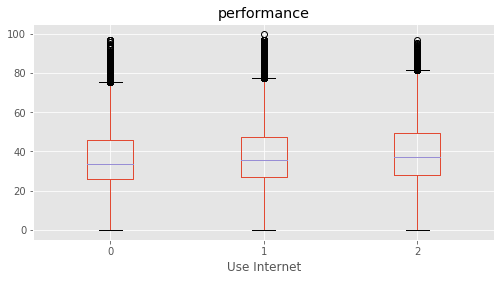

            Column Name Level Rename
63  Use dictionary   No     1     No
64  Use dictionary  Yes     2    Yes


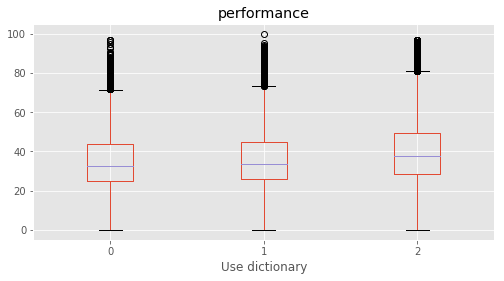

              Column Name Level Rename
65  Read other books   No     1     No
66  Read other books  Yes     2    Yes


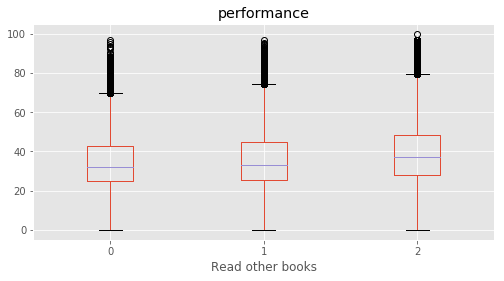

     Column                Name Level        Rename
67  # Books        11to25 books     3  11-125 books
68  # Books         1to10 books     2    1-10 books
69  # Books  More than 25 books     4     25+ books
70  # Books            No books     1      No books


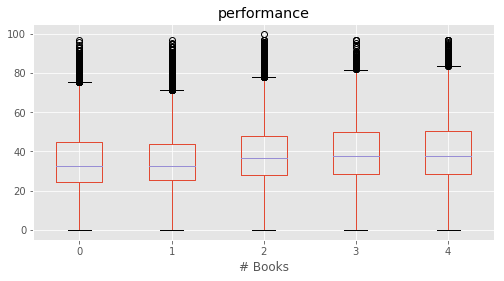

      Column                 Name Level          Rename
71  Distance  More than 1 to 3 km     2          1-3 km
72  Distance  More than 3 to 5 km     3          3-5 km
73  Distance       More than 5 km     4  More than 5 km
74  Distance           Up to 1 km     1      Up to 1 km


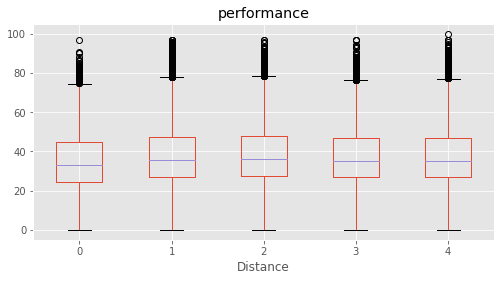

          Column                Name Level          Rename
75  Computer use               Daily     5           Daily
76  Computer use         No computer     1     No computer
77  Computer use      Once in a week     4  Once in a week
78  Computer use       Once in month     3   Once in month
79  Computer use  Yes, but never use     2       Never use


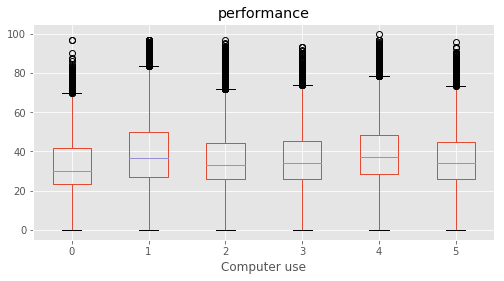

         Column                      Name Level                    Rename
80  Library use  More than once in a week     5  More than once in a week
81  Library use                No library     1                No library
82  Library use            Once in a week     4            Once in a week
83  Library use  Once or twice in a month     3  Once or twice in a month
84  Library use        Yes, but never use     2                 Never use


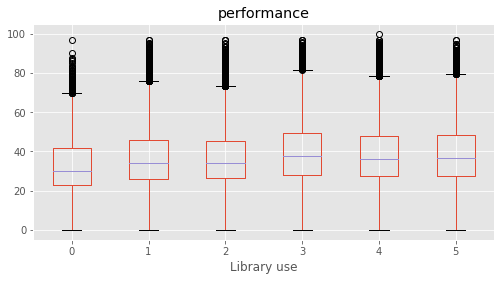

         Column Name Level Rename
85  Like school   No     1     No
86  Like school  Yes     2    Yes


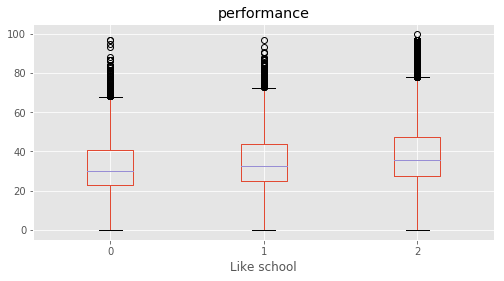

      Column            Name Level          Rename
87  Subjects        Language     L        Language
88  Subjects     Mathematics     M     Mathematics
89  Subjects            None     0            None
90  Subjects         Science     S         Science
91  Subjects  Social Science     O  Social Science


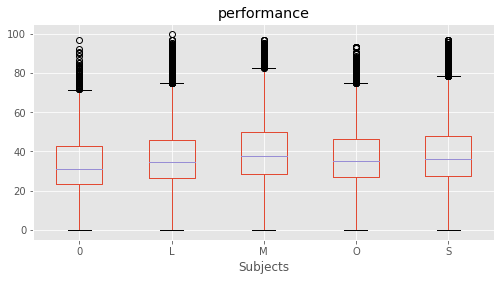

          Column               Name Level            Rename
92  Give Lang HW  1or2 times a week     2  1-2 times a week
93  Give Lang HW  3or4 times a week     3  3-4 times a week
94  Give Lang HW           Everyday     4          Everyday
95  Give Lang HW              Never     1             Never


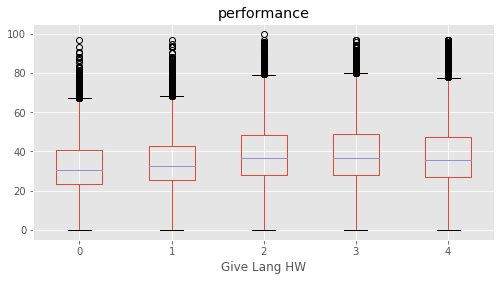

          Column               Name Level            Rename
96  Give Math HW  1or2 times a week     2  1-2 times a week
97  Give Math HW  3or4 times a week     3  3-4 times a week
98  Give Math HW           Everyday     4          Everyday
99  Give Math HW              Never     1             Never


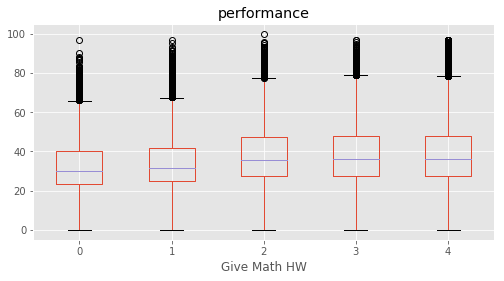

           Column               Name Level            Rename
100  Give Scie HW  1or2 times a week     2  1-2 times a week
101  Give Scie HW  3or4 times a week     3  3-4 times a week
102  Give Scie HW           Everyday     4          Everyday
103  Give Scie HW              Never     1             Never


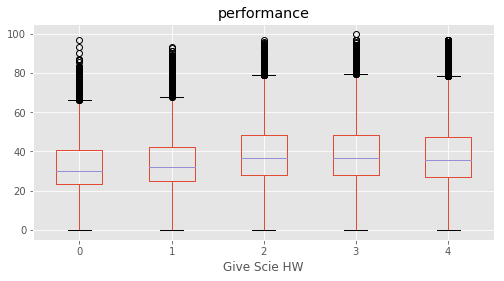

           Column               Name Level            Rename
104  Give SoSc HW  1or2 times a week     2  1-2 times a week
105  Give SoSc HW  3or4 times a week     3  3-4 times a week
106  Give SoSc HW           Everyday     4          Everyday
107  Give SoSc HW              Never     1             Never


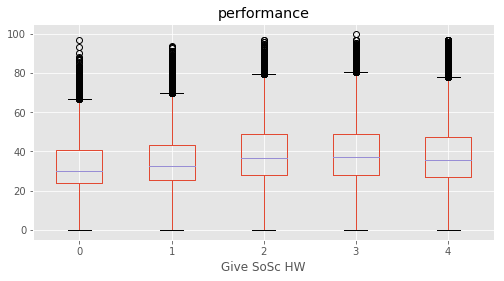

              Column                Name Level            Rename
108  Correct Lang HW  1 or2 times a week     2  1-2 times a week
109  Correct Lang HW  3 or4 times a week     3  3-4 times a week
110  Correct Lang HW            Everyday     4          Everyday
111  Correct Lang HW               Never     1             Never


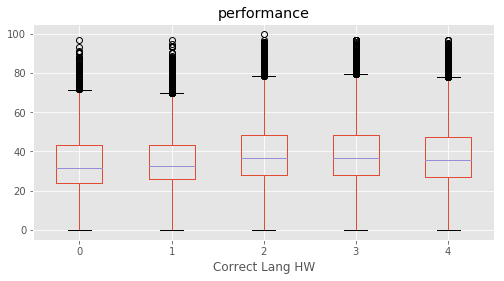

              Column                Name Level            Rename
112  Correct Math HW  1 or2 times a week     2  1-2 times a week
113  Correct Math HW  3 or4 times a week     3  3-4 times a week
114  Correct Math HW            Everyday     4          Everyday
115  Correct Math HW               Never     1             Never


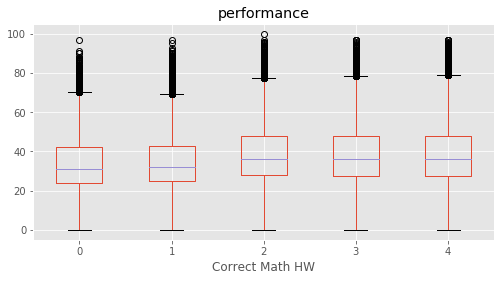

              Column                Name Level            Rename
116  Correct Scie HW  1 or2 times a week     2  1-2 times a week
117  Correct Scie HW  3 or4 times a week     3  3-4 times a week
118  Correct Scie HW            Everyday     4          Everyday
119  Correct Scie HW               Never     1             Never


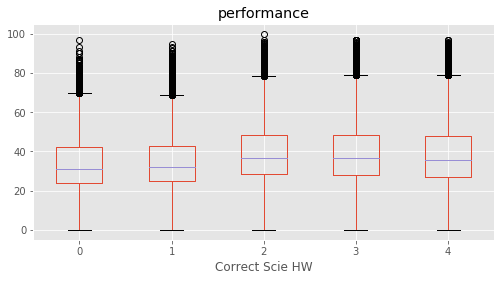

              Column                Name Level            Rename
120  Correct SocS HW  1 or2 times a week     2  1-2 times a week
121  Correct SocS HW  3 or4 times a week     3  3-4 times a week
122  Correct SocS HW            Everyday     4          Everyday
123  Correct SocS HW               Never     1             Never


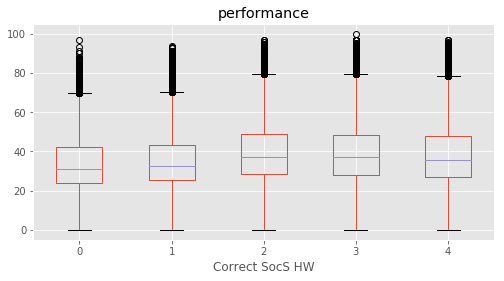

            Column Name Level Rename
124  Help in Study   No     1     No
125  Help in Study  Yes     2    Yes


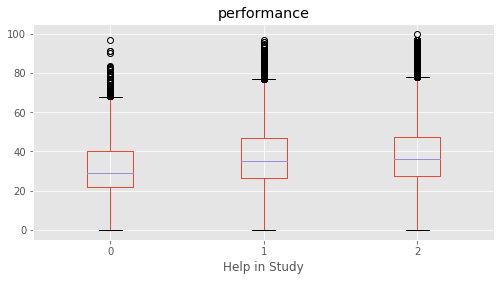

              Column Name Level Rename
126  Private tuition   No     1     No
127  Private tuition  Yes     2    Yes


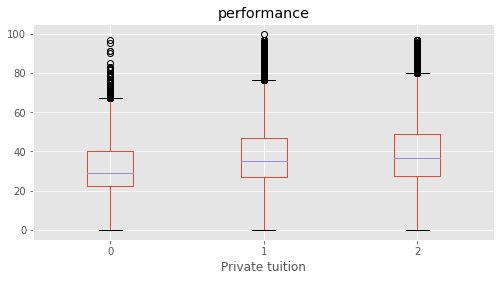

                   Column                       Name Level    Rename
128  English is difficult                      Agree     3     Agree
129  English is difficult                   Disagree     1  Disagree
130  English is difficult  Neither agree or disagree     2   Neither


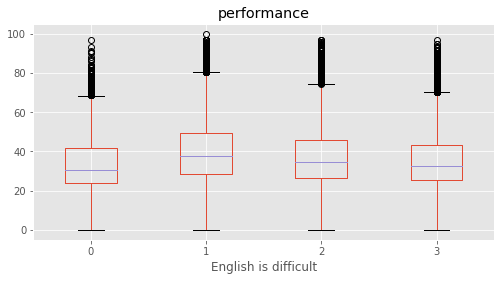

           Column                       Name Level    Rename
131  Read English                      Agree     3     Agree
132  Read English                   Disagree     1  Disagree
133  Read English  Neither agree or disagree     2   Neither


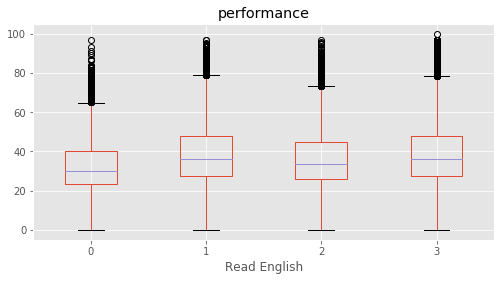

                  Column                       Name Level    Rename
134  Dictionary to learn                      Agree     3     Agree
135  Dictionary to learn                   Disagree     1  Disagree
136  Dictionary to learn  Neither agree or disagree     2   Neither


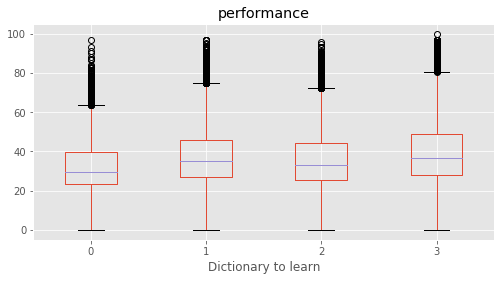

                Column                       Name Level    Rename
137  Answer English WB                      Agree     3     Agree
138  Answer English WB                   Disagree     1  Disagree
139  Answer English WB  Neither agree or disagree     2   Neither


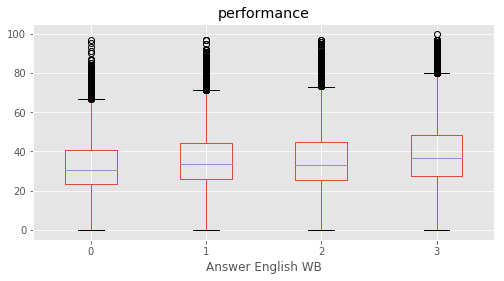

                   Column                       Name Level    Rename
140  Answer English aloud                      Agree     3     Agree
141  Answer English aloud                   Disagree     1  Disagree
142  Answer English aloud  Neither agree or disagree     2   Neither


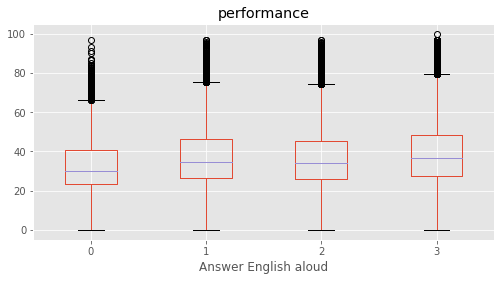

                 Column                       Name Level    Rename
143  Maths is difficult                      Agree     3     Agree
144  Maths is difficult                   Disagree     1  Disagree
145  Maths is difficult  Neither agree or disagree     2   Neither


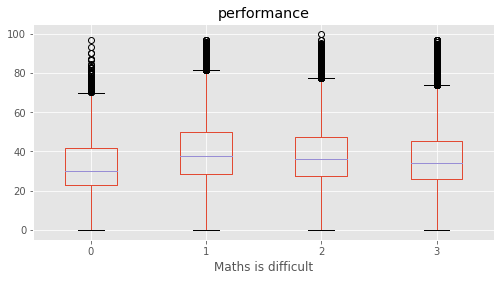

          Column                       Name Level    Rename
146  Solve Maths                      Agree     3     Agree
147  Solve Maths                   Disagree     1  Disagree
148  Solve Maths  Neither agree or disagree     2   Neither


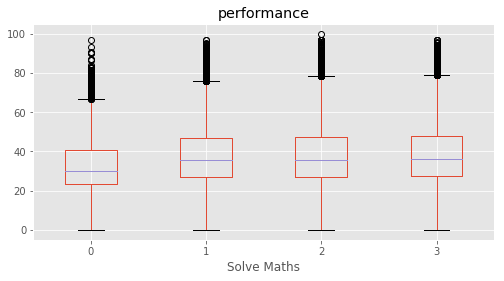

                    Column                       Name Level    Rename
149  Solve Maths in groups                      Agree     3     Agree
150  Solve Maths in groups                   Disagree     1  Disagree
151  Solve Maths in groups  Neither agree or disagree     2   Neither


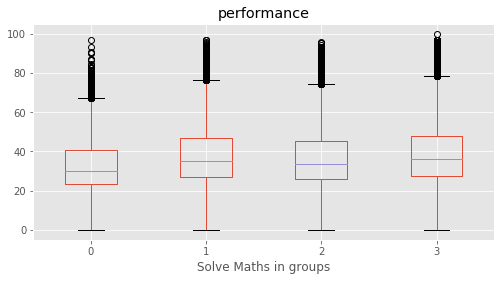

            Column                       Name Level    Rename
152  Draw geometry                      Agree     3     Agree
153  Draw geometry                   Disagree     1  Disagree
154  Draw geometry  Neither agree or disagree     2   Neither


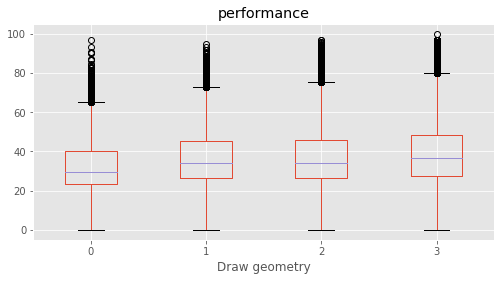

              Column                       Name Level    Rename
155  Explain answers                      Agree     3     Agree
156  Explain answers                   Disagree     1  Disagree
157  Explain answers  Neither agree or disagree     2   Neither


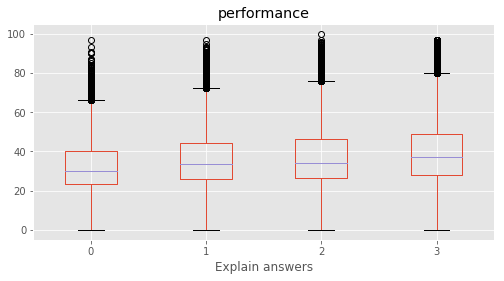

                  Column                       Name Level    Rename
158  SocSci is difficult                      Agree     3     Agree
159  SocSci is difficult                   Disagree     1  Disagree
160  SocSci is difficult  Neither agree or disagree     2   Neither


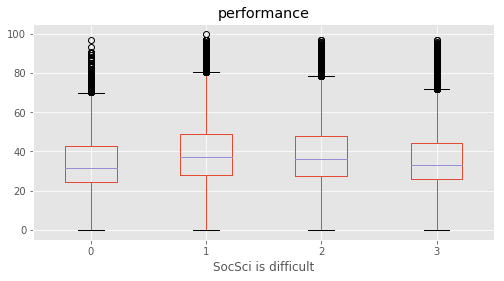

                    Column                       Name Level    Rename
161  Historical excursions                      Agree     3     Agree
162  Historical excursions                   Disagree     1  Disagree
163  Historical excursions  Neither agree or disagree     2   Neither


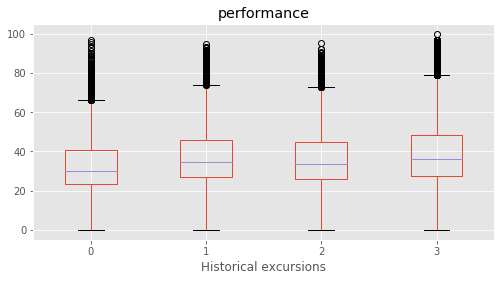

                    Column                       Name Level    Rename
164  Participate in SocSci                      Agree     3     Agree
165  Participate in SocSci                   Disagree     1  Disagree
166  Participate in SocSci  Neither agree or disagree     2   Neither


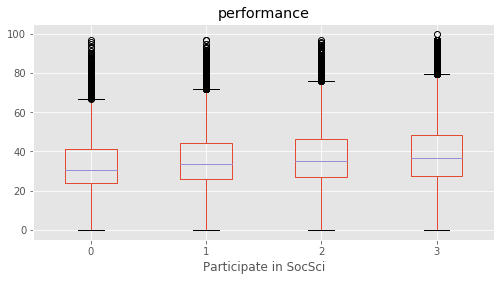

                     Column                       Name Level    Rename
167  Small groups in SocSci                      Agree     3     Agree
168  Small groups in SocSci                   Disagree     1  Disagree
169  Small groups in SocSci  Neither agree or disagree     2   Neither


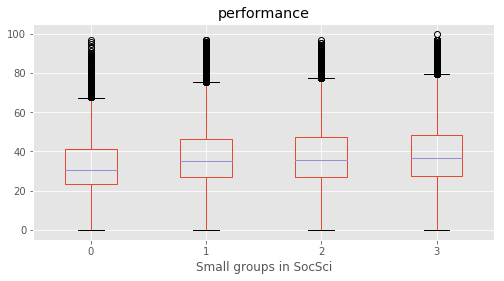

                   Column                       Name Level    Rename
170  Express SocSci views                      Agree     3     Agree
171  Express SocSci views                   Disagree     1  Disagree
172  Express SocSci views  Neither agree or disagree     2   Neither


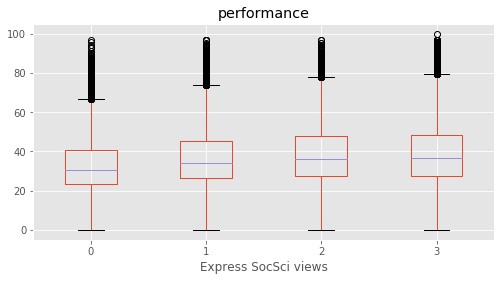

                   Column                       Name Level    Rename
173  Science is difficult                      Agree     3     Agree
174  Science is difficult                   Disagree     1  Disagree
175  Science is difficult  Neither agree or disagree     2   Neither


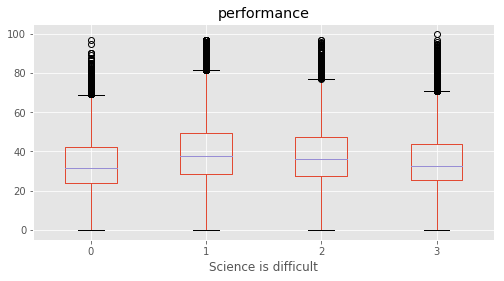

                  Column                       Name Level    Rename
176  Observe experiments                      Agree     3     Agree
177  Observe experiments                   Disagree     1  Disagree
178  Observe experiments  Neither agree or disagree     2   Neither


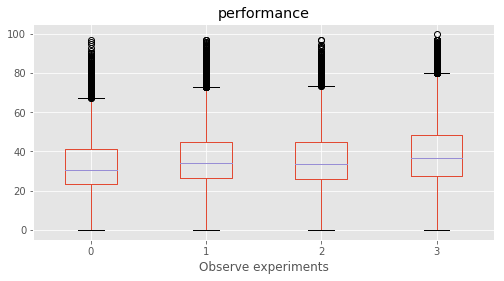

                  Column                       Name Level    Rename
179  Conduct experiments                      Agree     3     Agree
180  Conduct experiments                   Disagree     1  Disagree
181  Conduct experiments  Neither agree or disagree     2   Neither


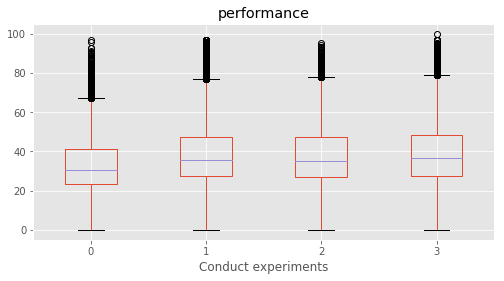

                     Column                       Name Level    Rename
182  Solve science problems                      Agree     3     Agree
183  Solve science problems                   Disagree     1  Disagree
184  Solve science problems  Neither agree or disagree     2   Neither


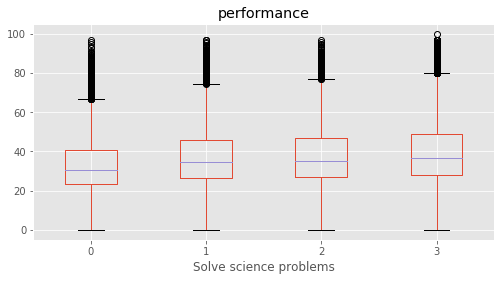

                    Column                       Name Level    Rename
185  Express science views                      Agree     3     Agree
186  Express science views                   Disagree     1  Disagree
187  Express science views  Neither agree or disagree     2   Neither


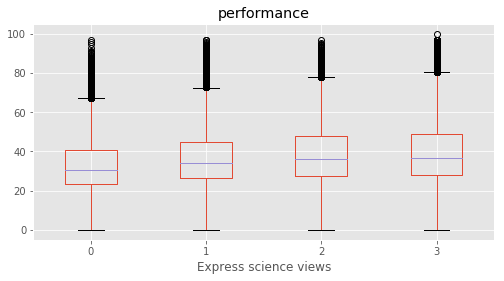

       Column          Name Level        Rename
188  Watch TV     Every day     4     Every day
189  Watch TV         Never     1         Never
190  Watch TV  Once a month     2  Once a month
191  Watch TV   Once a week     3   Once a week


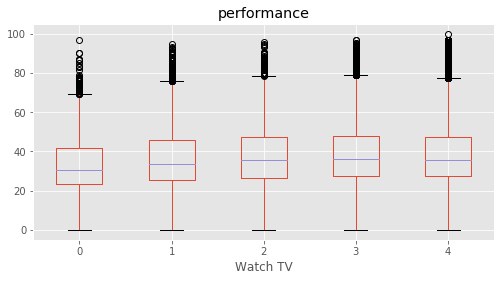

            Column          Name Level        Rename
192  Read magazine     Every day     4     Every day
193  Read magazine         Never     1         Never
194  Read magazine  Once a month     2  Once a month
195  Read magazine   Once a week     3   Once a week


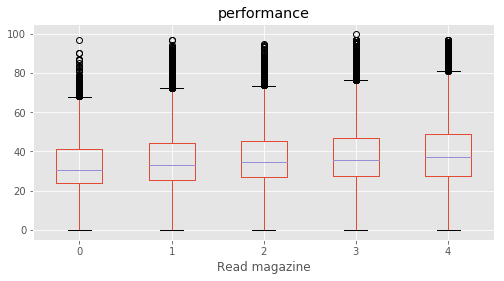

          Column          Name Level        Rename
196  Read a book     Every day     4     Every day
197  Read a book         Never     1         Never
198  Read a book  Once a month     2  Once a month
199  Read a book   Once a week     3   Once a week


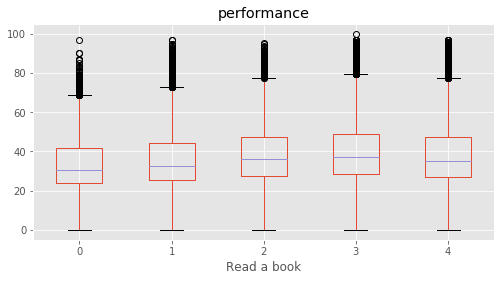

         Column          Name Level        Rename
200  Play games     Every day     4     Every day
201  Play games         Never     1         Never
202  Play games  Once a month     2  Once a month
203  Play games   Once a week     3   Once a week


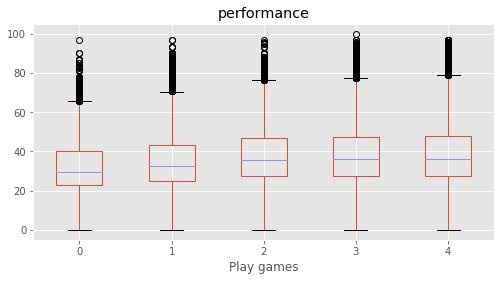

                Column          Name Level        Rename
204  Help in household     Every day     4     Every day
205  Help in household         Never     1         Never
206  Help in household  Once a month     2  Once a month
207  Help in household   Once a week     3   Once a week


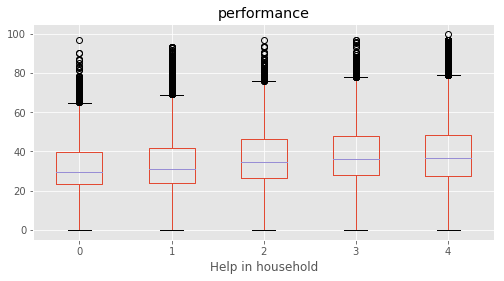

In [8]:
# Plotting performance based on each category value in the dataframe

for c in category:
    marks.boxplot(column="performance", by=c,figsize=(8, 4))
    print (labels[labels["Column"]==c])
    plt.suptitle("")
    plt.show()

In [9]:
def clean_data(marks, y_col_name="performance"):
    # Creating traning set X and target y
    from sklearn.preprocessing import LabelEncoder

    # Remove all rows with performance is undefined i.e. "NaN" 
    marks_nona = marks.dropna(subset=[y_col_name])

    # Cloning marks to make a training set X
    X = marks_nona[category].copy(deep=True)

    # string encoded columns are converted to np array to create training set x
    encoded_columns = ["State","Use computer", "Subjects"]
    le_state = LabelEncoder()
    le_subject = LabelEncoder()
    le_use_comp = LabelEncoder()
    X["State"] = le_state.fit_transform(X["State"])
    X["Subjects"] = le_subject.fit_transform(X["Subjects"])
    X["Use computer"] = le_use_comp.fit_transform(X["Use computer"].fillna(value="0"))

    print("Shape of X\t:",X.shape)

    # target variable y 
    y = marks_nona[y_col_name]
    print ("Shape of y\t:",y.shape)
    return X, y

In [10]:
def best_features(X,y):
    # Pipeline is defined for feature selection
    from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler

    pipe = Pipeline(steps = [('scaler', StandardScaler()),\
                                ('selK', SelectKBest(k="all",score_func=f_regression))])
    pipe.fit(X.astype(float).values,y.astype(float).values)

    # score of top 10 features is sorted in descending order
    k_scores = pipe.named_steps["selK"].scores_
#     k_scores = k_scores/sum(k_scores)
    scores_tuple = zip(X.columns,k_scores)
    sorted_scores = sorted(scores_tuple,key=lambda score:score[1], reverse=True)
    print ("Best 5 Features:\n",sorted_scores[:5])
    
    # Plotting the best features
    fig=plt.figure(figsize=(12,5))
    plt.bar(np.arange(len(k_scores)),k_scores,label = X.columns)
    plt.axhline(y=max(k_scores)*0.6,color='b',linewidth=.5)
    plt.xticks(np.arange(len(k_scores)),X.columns,rotation="vertical")
    plt.ylabel("K-Scores")
    plt.show()
    
    return sorted_scores

def tuple_to_dict(scores_tuple):
    """
    converts an array of tuple (key,value) to a dictionary {key:value}
    """
    i = 0;
    my_dict = {}
    while i<len(scores_tuple):
        key, value = scores_tuple[i]
        my_dict.update({key : value})
        i = i+1
    return my_dict
    

======	Target Variable	: performance ======
Shape of X	: (180774, 59)
Shape of y	: (180774,)
Best 5 Features:
 [('Father edu', 3906.8744966773766), ('Mother edu', 3052.1893687615902), ('Help in household', 2793.8799410412198), ('Read other books', 2661.1779134014673), ('Father occupation', 2428.0365114374408)]


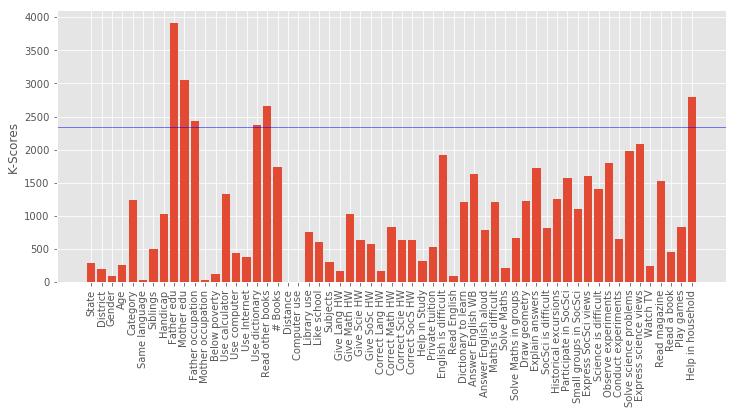

        Column                    Name Level          Rename
24  Father edu        Degree and above     5  Degree & above
25  Father edu              Illiterate     1      Illiterate
26  Father edu          Not applicable     0  Not applicable
27  Father edu           Primary level     2         Primary
28  Father edu         Secondary level     3       Secondary
29  Father edu  Senior secondary level     4    Sr secondary


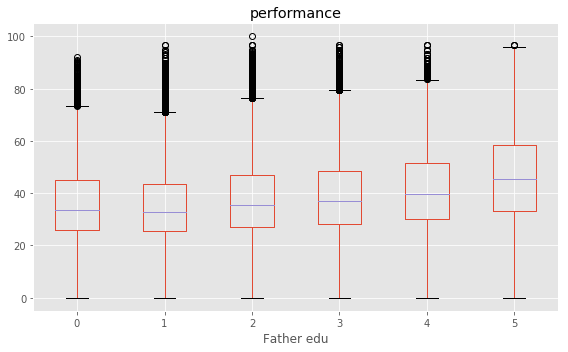

======	Target Variable	: Maths % ======
Shape of X	: (92681, 59)
Shape of y	: (92681,)
Best 5 Features:
 [('Help in household', 914.12688336032204), ('Computer use', 651.62580084653632), ('Dictionary to learn', 610.29101679041355), ('Maths is difficult', 556.06941787824678), ('Solve science problems', 526.11708504368846)]


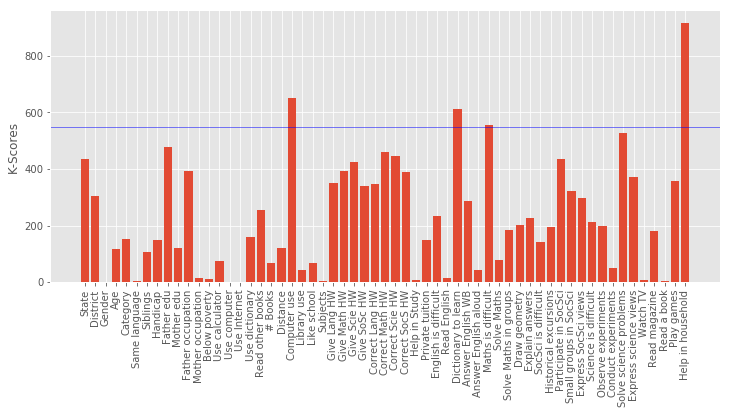

                Column          Name Level        Rename
204  Help in household     Every day     4     Every day
205  Help in household         Never     1         Never
206  Help in household  Once a month     2  Once a month
207  Help in household   Once a week     3   Once a week


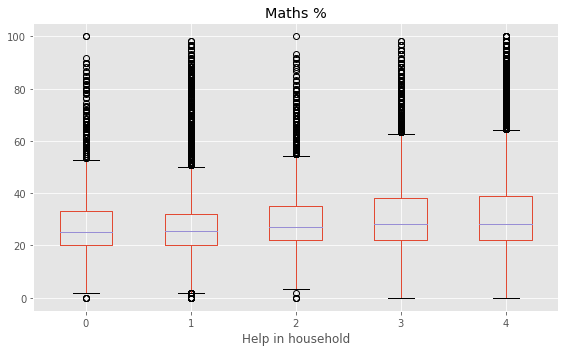

======	Target Variable	: Reading % ======
Shape of X	: (93271, 59)
Shape of y	: (93271,)
Best 5 Features:
 [('Mother edu', 3424.4980512295078), ('Father edu', 3329.8749927211034), ('Use dictionary', 2309.8832945874847), ('Read other books', 2200.3369324634891), ('# Books', 1922.4965853283888)]


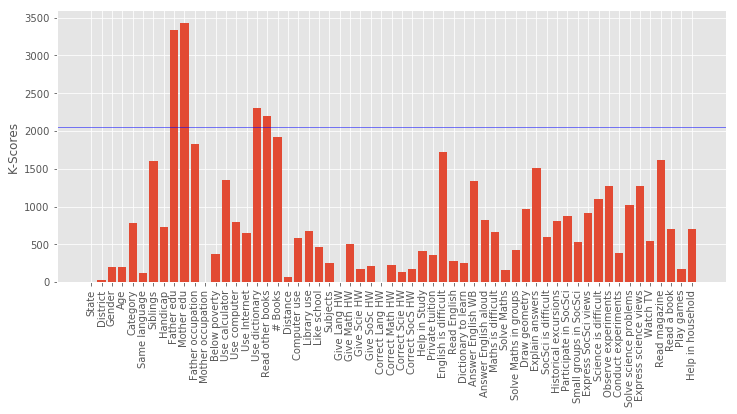

        Column                    Name Level          Rename
30  Mother edu        Degree and above     5  Degree & above
31  Mother edu              Illiterate     1      Illiterate
32  Mother edu          Not applicable     0  Not applicable
33  Mother edu           Primary level     2         Primary
34  Mother edu         Secondary level     3       Secondary
35  Mother edu  Senior secondary level     4    Sr secondary


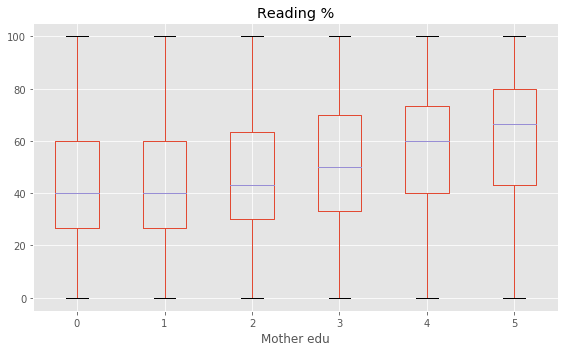

======	Target Variable	: Science % ======
Shape of X	: (90992, 59)
Shape of y	: (90992,)
Best 5 Features:
 [('Father edu', 1227.5175152615805), ('Help in household', 1024.425737832905), ('Mother edu', 985.68094452340586), ('Read other books', 960.69082698717637), ('Father occupation', 887.2845094505285)]


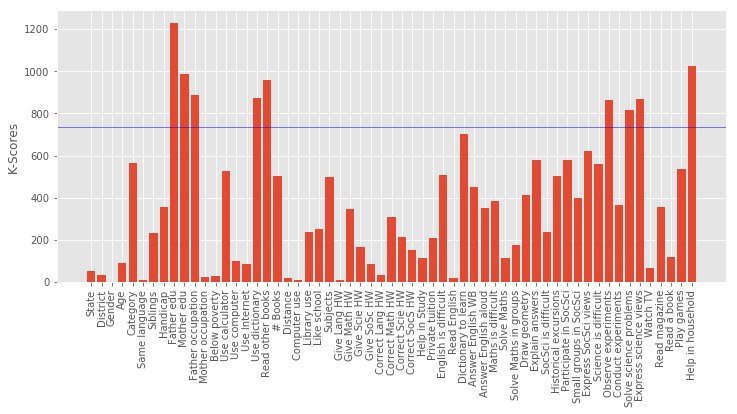

        Column                    Name Level          Rename
24  Father edu        Degree and above     5  Degree & above
25  Father edu              Illiterate     1      Illiterate
26  Father edu          Not applicable     0  Not applicable
27  Father edu           Primary level     2         Primary
28  Father edu         Secondary level     3       Secondary
29  Father edu  Senior secondary level     4    Sr secondary


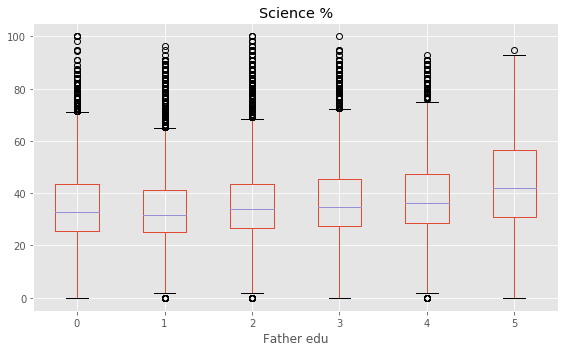

======	Target Variable	: Social % ======
Shape of X	: (89571, 59)
Shape of y	: (89571,)
Best 5 Features:
 [('Help in household', 1953.6981406711302), ('Father edu', 1042.1749875474054), ('Read other books', 862.49475538243018), ('Solve science problems', 843.71858538199774), ('Express science views', 771.77171134892569)]


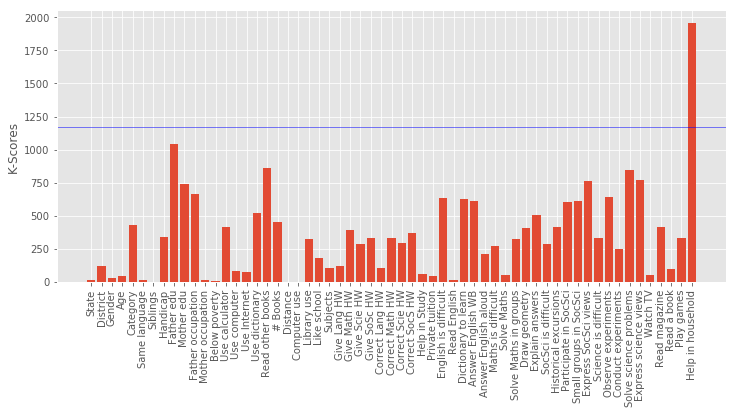

                Column          Name Level        Rename
204  Help in household     Every day     4     Every day
205  Help in household         Never     1         Never
206  Help in household  Once a month     2  Once a month
207  Help in household   Once a week     3   Once a week


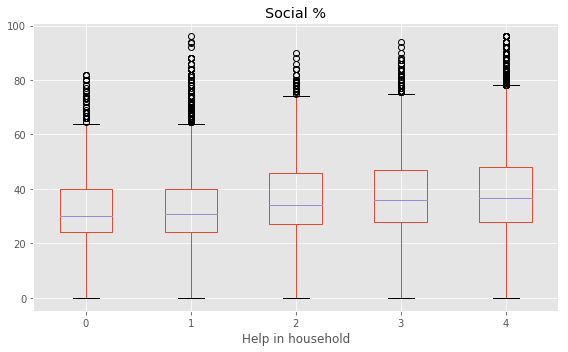

In [11]:
target = ["performance","Maths %","Reading %","Science %","Social %"]
final_stat = {}

for t in target:
    print("======\tTarget Variable\t:",t,"======")
    X, y = clean_data(marks,y_col_name=t)
    sorted_scores = best_features(X,y)
    final_stat.update({t : tuple_to_dict(sorted_scores)})
    best_f = sorted_scores[0][0]
    
    # plotting
    marks.boxplot(column=t, by=best_f,figsize=(8,5))
    plt.title(t)
    plt.tight_layout()
    plt.suptitle("")
    print (labels[labels["Column"]==best_f])
    plt.show()

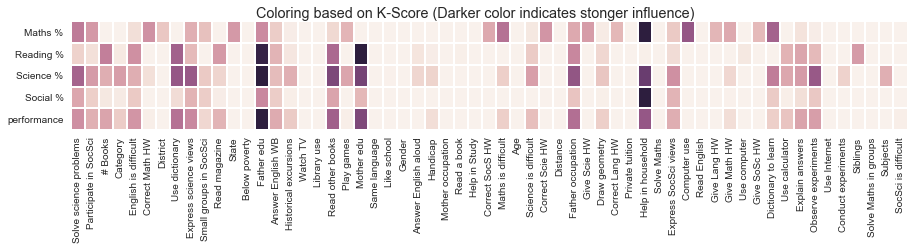

In [12]:
# K-scores are normalized by maximum score (along each row) to show the strongest predictor for each row
import seaborn as sns
s = pd.DataFrame.from_dict(final_stat, orient='index')
final = s.divide(s.max(axis=1),axis = 0)

# plotting heat map 
plt.figure(figsize=(15,2))
f = sns.heatmap(final, linewidths = 1,square= False, cbar= False, vmin=0.2)
plt.suptitle("Coloring based on K-Score (Darker color indicates stonger influence)")
plt.show()

### How do boys and girls perform across states?

Across various states Girls tend to have a higher median performance than boys.

Some of the states with notable exception to this rule is Jharkand (JH) and Bihar (BH). Since these state have high gender inequality, this trend could be due to lack of access to education to girls. To confirm, it has to crosschecked with percentage of girls with access to education.

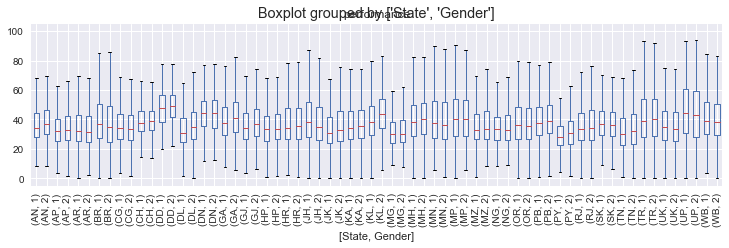

In [13]:
# Eliminating Gender not equal to 1 or 2
marks_gender = marks.dropna(subset=["performance"])
marks_gender =marks_gender[marks_gender["Gender"]!=0]
marks_gender.boxplot(column="performance", by=["State","Gender"], figsize=(12, 3))
plt.xticks(rotation="vertical")
plt.show()

In [14]:
# Gender: boy =1, girl =2

gender_performance = marks_gender.groupby(["State","Gender"]).median()["performance"]

perf_lst = []
for l in gender_performance.index:
    perf_dict = {
        "State" : l[0],
        "Gender" : l[1],
        "performance" : gender_performance[l]    
    }
    perf_lst.append(perf_dict)

In [15]:
G_perfomance = pd.DataFrame(perf_lst)
G_perfomance = G_perfomance.pivot(index='State', columns='Gender', values='performance')
G_perfomance.columns = ["Boy","Girl"]
G_perfomance["diff"]=G_perfomance["Boy"]-G_perfomance["Girl"]
G_perfomance["Boys_better"]=(G_perfomance["Boy"]-G_perfomance["Girl"])>0

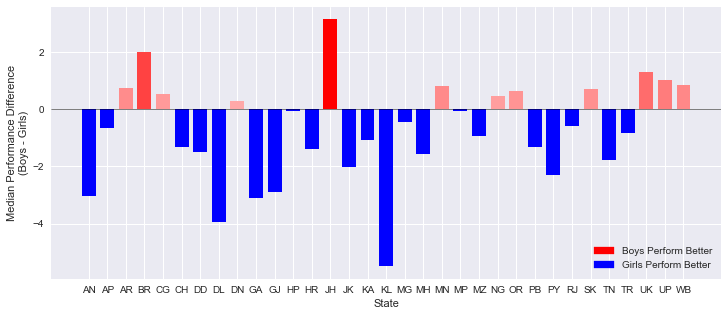

In [16]:
import matplotlib.colors as colors
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatches

plt.figure(figsize=(12,5))

# setting colors. Maps the max and min values in "diff" to a color map bwr
c_normal = colors.PowerNorm(1,vmin=min(G_perfomance["diff"]), vmax=max(G_perfomance["diff"]))
_COLORS = cmap(c_normal(G_perfomance["diff"]))

plt.bar(np.arange(len(G_perfomance["diff"])), 
        height = G_perfomance["diff"], width = 0.75, align = "center", color=_COLORS)
plt.xticks(np.arange(len(G_perfomance.index)),list(G_perfomance.index))
plt.axhline(0, color='k', linewidth = 0.5)
plt.xlabel("State")
plt.ylabel("Median Performance Difference\n(Boys - Girls)")

# creating legend patches
red_patch = mpatches.Patch(color='red', label='Boys Perform Better')
blue_patch = mpatches.Patch(color='blue', label='Girls Perform Better')
plt.legend(handles=[red_patch, blue_patch], loc=4)

plt.show()

In [17]:
# Sorted list of States with higher performance for Boys
G_perfomance[G_perfomance["diff"]>0].sort_values("diff", ascending=False)

,Boy,Girl,diff,Boys_better
State,,,,
JH,38.335000,35.1925,3.142500,True
BR,37.000000,35.0000,2.000000,True
UK,34.965000,33.6750,1.290000,True
UP,44.365000,43.3350,1.030000,True
WB,39.165000,38.3350,0.830000,True
MN,37.275000,36.4650,0.810000,True
AR,32.087500,31.3350,0.752500,True
SK,36.777500,36.0700,0.707500,True
OR,36.370000,35.7400,0.630000,True


In [18]:
# Sorted list of States with higher performance for Girls
G_perfomance[G_perfomance["diff"]<0].sort_values("diff", ascending=True)

,Boy,Girl,diff,Boys_better
State,,,,
KL,38.2950,43.79500,-5.50000,False
DL,31.0700,35.00000,-3.93000,False
GA,37.7250,40.83500,-3.11000,False
AN,34.0550,37.10125,-3.04625,False
GJ,34.1050,36.99000,-2.88500,False
PY,28.2850,30.60000,-2.31500,False
JK,30.8450,32.85500,-2.01000,False
TN,30.1800,31.95000,-1.77000,False
MH,38.5050,40.07000,-1.56500,False


### Do students from South Indian states really excel at Math and Science?

In order to do the analysis, Here we considered southern states as : "Andhra Pradesh", "Kerala", "Karnataka" and "Tamil Nadu". Meanwhile other states are referred to "the rest of the country". The performance score for 'Science and Math' is defined as the mean value of both 'Science' and 'Math'. 

We found that central tendendencies of `Southern States` to be slight lower than the rest of the country. But it should be noted that the number of samples in the `Southern States` is far less. Also, it should be understood that the enrollment rate of southern states is usually higher than rest of country which could be driving down the median values.

To identify if all southern states follow this pattern, we split the data into corresponding southern states. We found that "Kerala" as a notable exception to the trend of southern states. "Kerala" tends to have higher median score than other southern states, rest of the country and the overall median of country. Another exception is the distribution of marks from "Tamil Nadu" with longer tails. "Tamil Nadu" followed the trend of the rest of the country with longer tails at highest end but has lower median score than all others.

In [19]:
marks['math_sci'] = marks[['Maths %','Science %']].apply(np.nanmean,axis=1)

In [20]:
# Defining a dataframe "south" with columns = [state,math_science]. 
south = marks[['State','Maths %','Science %','math_sci']].dropna(subset=['Maths %','Science %'])
print (south.isnull().sum())
print(south.columns)

State        0
Maths %      0
Science %    0
math_sci     0
dtype: int64
Index(['State', 'Maths %', 'Science %', 'math_sci'], dtype='object')


In [21]:
# separating southern states from rest of the country
STATES = list(south["State"].unique())
SOUTH_STATES = ["KL", "AP","TN","KA"]
REST = [S for S in STATES if S not in SOUTH_STATES]
south["is_south"] = south["State"].isin(SOUTH_STATES)

# function to add a new column "south_vs_rest"
def add_col_south_vs_rest(south,SOUTH_STATES):
    """
    Returns a new lst with south["state"] as 
    the value if the state is in SOUTH_STATES, 
    else with the value "Rest"
    """
    lst = []
    for index in range(south.shape[0]):
        state = south.iloc[index]["State"]
        if state in SOUTH_STATES:
            lst.append(state)
        else:
            lst.append("Rest")
    return lst
south["south_vs_rest"] = add_col_south_vs_rest(south,SOUTH_STATES)
south.tail(2)

,State,Maths %,Science %,math_sci,is_south,south_vs_rest
185346,DD,18.33,33.93,26.130,False,Rest
185347,DD,23.73,41.82,32.775,False,Rest


In [22]:
print (south.describe())
south.groupby(by = "is_south").describe()

            Maths %     Science %      math_sci
count  17895.000000  17895.000000  17895.000000
mean      32.529734     37.661108     35.095421
std       15.194263     14.944558     13.059281
min        0.000000      0.000000      0.000000
25%       22.030000     27.270000     25.925000
50%       28.810000     34.550000     32.145000
75%       38.980000     46.430000     41.877500
max       98.310000     94.640000     94.675000


Maths %                                                         \
            count       mean        std  min    25%    50%    75%    max   
is_south                                                                   
False     16430.0  32.870428  15.323894  0.0  22.03  28.81  40.00  98.31   
True       1465.0  28.708840  13.065838  0.0  20.37  25.93  33.93  96.43   

         Science %              ...                 math_sci             \
             count       mean   ...      75%    max    count       mean   
is_south                        ...                                       
False      16430.0  37.919125   ...    46.43  94.64  16430.0  35.394777   
True        1465.0  34.767433   ...    43.64  83.64   1465.0  31.738137   

                                                             
                std    min     25%     50%      75%     max  
is_south                                                     
False     13.148678  0.000  26.060  32.380  42.2725  94.675  
True      11.492805  0.925  24.075  29.985  37.9300  87.500  

[2 rows x 24 columns]

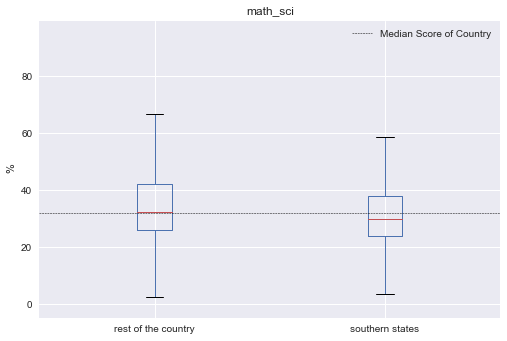

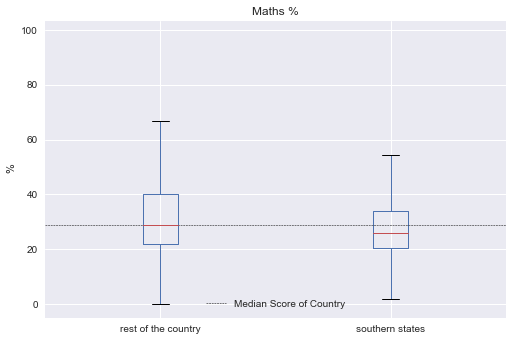

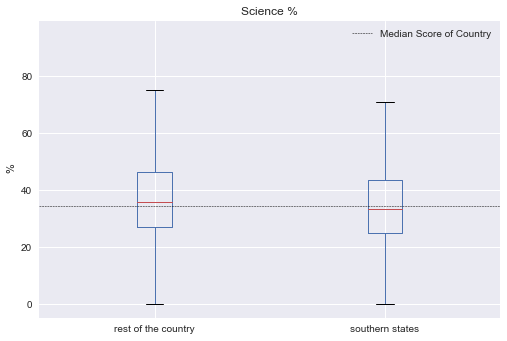

In [23]:
for factor in ["math_sci","Maths %","Science %"]:
    fig = south.boxplot(column = factor, by ="is_south")
    plt.axhline(south[factor].median(), color='k', linewidth = 0.5, linestyle ="--",\
                label="Median Score of Country")
    plt.ylabel(" %")
    fig.set_xticklabels(["rest of the country","southern states"])
    plt.suptitle("")
    plt.xlabel("")
    plt.legend()
    plt.show()

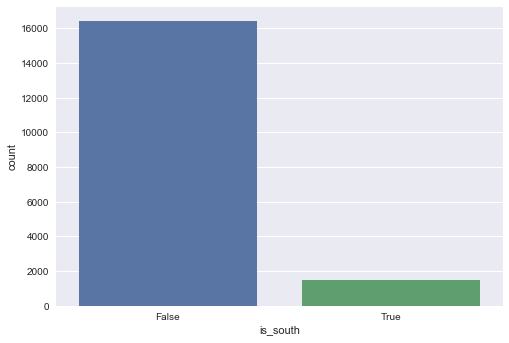

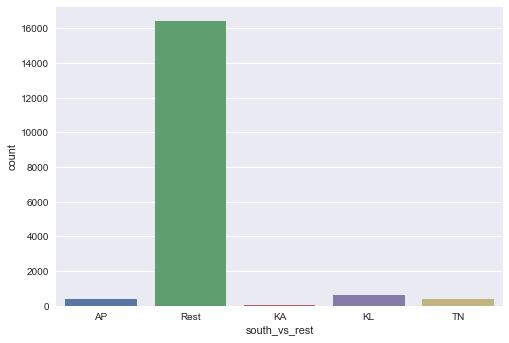

In [24]:
plt.figure(1)
sns.countplot(x="is_south", data=south)
plt.figure(2)
sns.countplot(x="south_vs_rest", data=south)
plt.show()

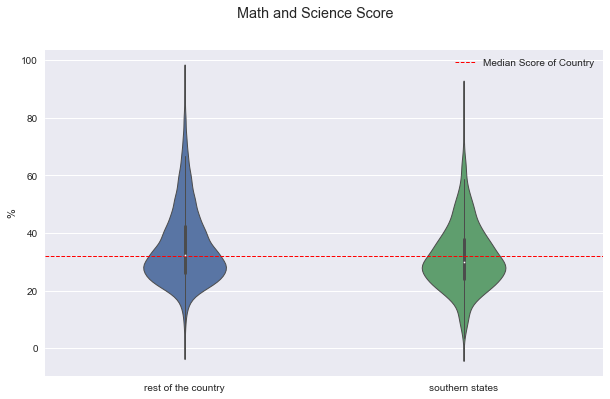

In [25]:
# sns.stripplot(x="is_south", y="math_sci",data=south, jitter=True, alpha=0.2)
plt.figure(figsize = (10,6))
f = sns.violinplot(x="is_south", y="math_sci",data=south, fliersize=0, width = .3, notch =True, linewidth =1)
plt.axhline(south["math_sci"].median(), color='r', linewidth = 1, linestyle ="--",\
                label="Median Score of Country")
f.set_xticklabels(["rest of the country","southern states"])
plt.suptitle("Math and Science Score")
plt.xlabel("")
plt.ylabel("%")
plt.legend()
plt.show()

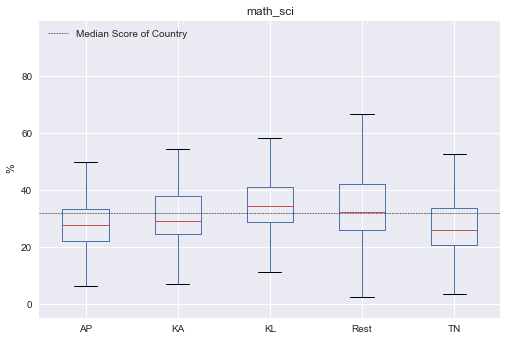

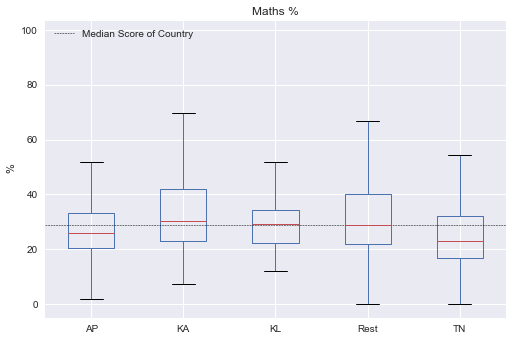

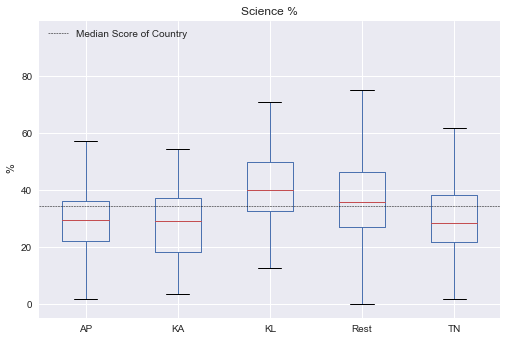

In [26]:
# spltting each southern state to compare with the rest of the country
for factor in ["math_sci","Maths %","Science %"]:
    fig = south.boxplot(column = factor, by ="south_vs_rest")
    plt.axhline(south[factor].median(), color='k', linewidth = 0.5, linestyle ="--",\
                label="Median Score of Country")
    plt.ylabel(" %")
    plt.suptitle("")
    plt.xlabel("")
    plt.legend()
    plt.show()

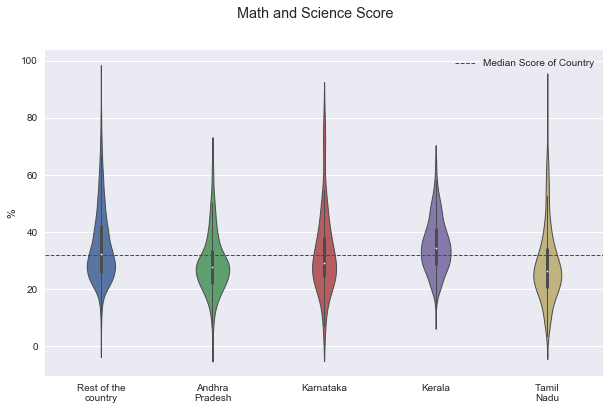

In [27]:
# Math and science score for each of the southern state
plt.figure(figsize = (10,6))

f = sns.violinplot(x="south_vs_rest", y="math_sci",data=south,\
                   fliersize=0, width = .3, notch =True, linewidth =1,\
                  order=["Rest","AP","KA","KL","TN"])
plt.axhline(south["math_sci"].median(), color='r', linewidth = 1, linestyle ="--",\
                label="Median Score of Country")
f.set_xticklabels(["Rest of the\ncountry","Andhra\nPradesh","Karnataka","Kerala", "Tamil\nNadu"])
plt.suptitle("Math and Science Score")
plt.xlabel("")
plt.ylabel("%")
plt.legend()
# plt.twinx()
# sns.countplot(x="south_vs_rest", data=south, width = 0.2)
plt.show()